In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import random
import glob


In [3]:
x = []
y = []

#BAD QUALITY FOOD

for alamat_gambar in glob.glob("capstone datasets/Bad Quality_Fruits/Apple_Bad/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(0)

for alamat_gambar in glob.glob("capstone datasets/Bad Quality_Fruits/Banana_Bad/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(1)

for alamat_gambar in glob.glob("capstone datasets/Bad Quality_Fruits/Guava_Bad/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(2)

for alamat_gambar in glob.glob("capstone datasets/Bad Quality_Fruits/Lime_Bad/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(3)

for alamat_gambar in glob.glob("capstone datasets/Bad Quality_Fruits/Orange_Bad/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(4)

for alamat_gambar in glob.glob("capstone datasets/Bad Quality_Fruits/Pomegranate_Bad/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(5)

#GOOD QUALITY FOOD

for alamat_gambar in glob.glob("capstone datasets/Good Quality_Fruits/Apple_Good/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(6)

for alamat_gambar in glob.glob("capstone datasets/Good Quality_Fruits/Banana_Good/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(7)

for alamat_gambar in glob.glob("capstone datasets/Good Quality_Fruits/Guava_Good/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(8)

for alamat_gambar in glob.glob("capstone datasets/Good Quality_Fruits/Lime_Good/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(9)

for alamat_gambar in glob.glob("capstone datasets/Good Quality_Fruits/Orange_Good/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(10)

for alamat_gambar in glob.glob("capstone datasets/Good Quality_Fruits/Pomegranate_Good/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(11)

#MIXED QUALITY FOOD

for alamat_gambar in glob.glob("capstone datasets/Mixed Quality_Fruits/Apple/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(12)

for alamat_gambar in glob.glob("capstone datasets/Mixed Quality_Fruits/Banana/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(13)

for alamat_gambar in glob.glob("capstone datasets/Mixed Quality_Fruits/Guava/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(14)
  
for alamat_gambar in glob.glob("capstone datasets/Mixed Quality_Fruits/Lemon/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(15)

for alamat_gambar in glob.glob("capstone datasets/Mixed Quality_Fruits/Orange/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(16)

for alamat_gambar in glob.glob("capstone datasets/Mixed Quality_Fruits/Pomegranate/*.jpg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(17)

z = list(zip(x, y))
random.shuffle(z)
x, y = zip(*z)
x = np.asarray(x)
y = np.asarray(y)

In [3]:
x.shape

(19511, 64, 64, 3)

In [4]:
y.shape

(19511,)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=x.shape[1:], activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(18, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 32)        

In [14]:
history = model.fit(x, y, batch_size=5, epochs=10, validation_split=0.2)

Epoch 1/10
3122/3122 [==============================] - 16s 5ms/step - loss: 1.2002 - accuracy: 0.6131 - val_loss: 0.7095 - val_accuracy: 0.7515
Epoch 2/10
3122/3122 [==============================] - 15s 5ms/step - loss: 0.5995 - accuracy: 0.8043 - val_loss: 0.7599 - val_accuracy: 0.7671
Epoch 3/10
3122/3122 [==============================] - 15s 5ms/step - loss: 0.4367 - accuracy: 0.8569 - val_loss: 0.3994 - val_accuracy: 0.8675
Epoch 4/10
3122/3122 [==============================] - 15s 5ms/step - loss: 0.3494 - accuracy: 0.8840 - val_loss: 0.3170 - val_accuracy: 0.9016
Epoch 5/10
3122/3122 [==============================] - 15s 5ms/step - loss: 0.2913 - accuracy: 0.9047 - val_loss: 0.3147 - val_accuracy: 0.9021
Epoch 6/10
3122/3122 [==============================] - 15s 5ms/step - loss: 0.2537 - accuracy: 0.9165 - val_loss: 0.2644 - val_accuracy: 0.9165
Epoch 7/10
3122/3122 [==============================] - 15s 5ms/step - loss: 0.2294 - accuracy: 0.9253 - val_loss: 0.6041 - val_ac

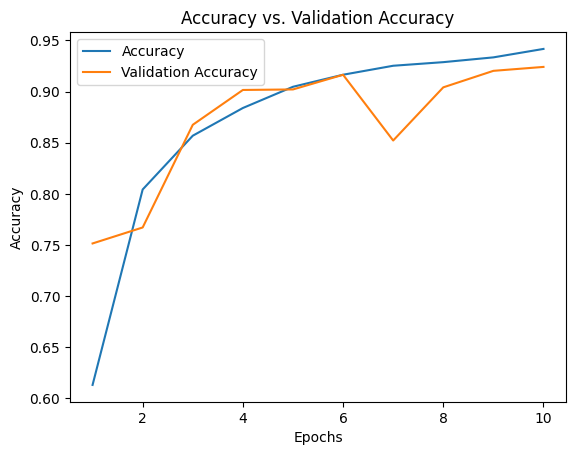

In [15]:
# Get the accuracy and validation accuracy values from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a list of epochs
epochs = range(1, len(accuracy) + 1)

# Plotting the accuracy and validation accuracy
plt.plot(epochs, accuracy, label='Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Validation Accuracy')

# Adding legend
plt.legend()

# Display the plot
plt.show()

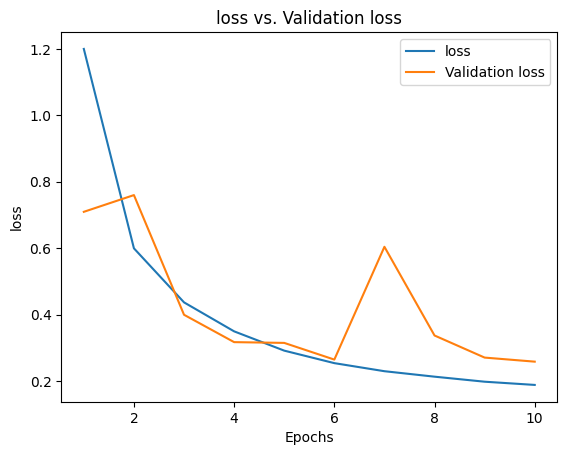

In [16]:
# Get the loss and validation loss values from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a list of epochs
epochs = range(1, len(loss) + 1)

# Plotting the loss and validation loss
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='Validation loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('loss vs. Validation loss')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [32]:
model.save('dfruitz_model_dropOut.h5')

In [13]:
new_model = tf.keras.models.load_model('dfruitz_model_dropOut.h5')

In [32]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)        

In [5]:
kamus = {0: "Apple_Bad", 1: "Banana_Bad", 2: "Guava_Bad",3: "Lime_Bad", 4: "Orange_Bad", 5: "Pomegranate_Bad",
         6: "Apple_Good", 7: "Banana_Good", 8: "Guava_Good",9: "Lime_Good", 10: "Orange_Good", 11: "Pomegranate_Good",
         12: "Apple_Mixed", 13: "Banana_Mixed", 14: "Guava_Mixed",15: "Lime_Mixed", 16: "Orange_Mixed", 17: "Pomegranate_Mixed"}



In [28]:
x_test = []

ini = cv2.resize(cv2.imread("D:\Bangkit\capstone\capstone datasets\Bad Quality_Fruits\Guava_Bad\IMG_20190822_080144.jpg"), (64, 64))/255
x_test.append(ini)

x_test = np.asarray(x_test)

y_pred = new_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
[kamus[_] for _ in y_pred]

1/1 [==============================] - 0s 13ms/step


['Guava_Bad']

In [29]:
print(y_pred)

[2]


In [9]:
print(tf.__version__)

2.9.0


In [34]:
import tensorflowjs as tfjs

In [16]:
!tensorflowjs_converter --input_format=keras D:\Bangkit\capstone\dfruitz_model_dropOut.h5 tfjs_model-coba